In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('/content/data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0         4.0
1  2018-01-04      1  address_0    product_1         4.0
2  2018-01-04      1  address_0    product_2         5.0
3  2018-01-04      1  address_0    product_3        10.0
4  2018-01-04      1  address_0    product_4         2.0


Проверяем формат столбцов

In [11]:
print(df.dtypes)

Дата             object
Склад             int64
Контрагент       object
Номенклатура     object
Количество      float64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [12]:
df['Дата'] = pd.to_datetime(df['Дата'])


Сгруппируйте данные по дате, посчитайте количество продаж

In [13]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()

Вывести несколько первых строк сгруппированных данных

In [14]:
print(grouped_df.head())

        Дата  Количество
0 2018-01-04      3734.0
1 2018-01-05      3643.0
2 2018-01-06      3193.0
3 2018-01-07      3298.0
4 2018-01-09      4055.0


Нарисуйте график продаж у `grouped_df`

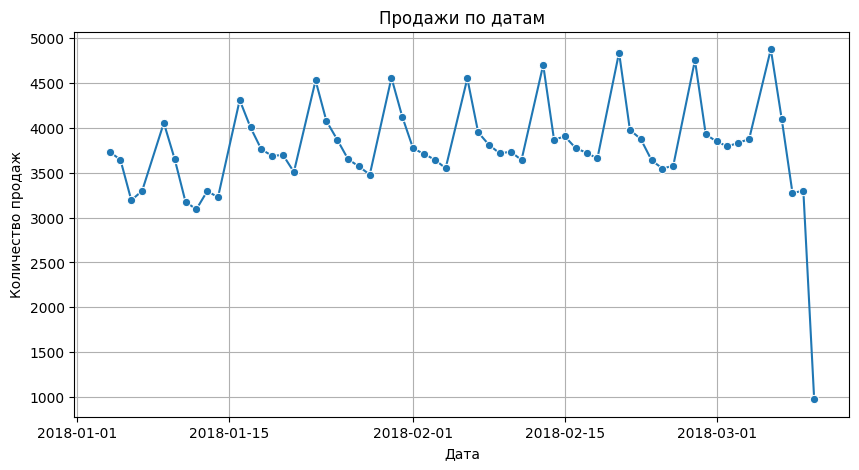

In [15]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=grouped_df, x='Дата', y='Количество', marker='o')
plt.title('Продажи по датам')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.grid(True)
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [16]:
outlier = df[df['Количество'] == df['Количество'].max()]
print("Максимальный выброс:")
print(outlier)


Максимальный выброс:
            Дата  Склад   Контрагент Номенклатура  Количество
74253 2018-03-02      5  address_194    product_1        40.0
75615 2018-03-03      5  address_194    product_1        40.0
75616 2018-03-03      5  address_194    product_2        40.0
78655 2018-03-06      5  address_194    product_1        40.0


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [17]:
df['Месяц'] = df['Дата'].dt.month
top_product = df[(df['Склад'] == 3) & (df['Месяц'].isin([6, 7, 8]))] \
    .groupby('Номенклатура')['Количество'].sum() \
    .sort_values(ascending=False).reset_index()
print("Топовый товар по складу 3 за лето:")
print(top_product)


Топовый товар по складу 3 за лето:
Empty DataFrame
Columns: [Номенклатура, Количество]
Index: []


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [1]:
import pandas as pd

df = pd.read_excel("/content/архив_погоды_Астана.xlsx")
print(df.head())

  Местное время в Астане     T     Po      P   Pa     U  \
0       30.03.2025 23:00   4.8  741.7  774.1  0.0  67.0   
1       30.03.2025 20:00   5.8  741.7  773.9  0.1  63.0   
2       30.03.2025 17:00  10.1  741.6  773.3 -0.1  39.0   
3       30.03.2025 14:00  11.1  741.7  773.3 -0.3  37.0   
4       30.03.2025 11:00   9.0  742.0  773.8  0.2  39.0   

                                DD   Ff  ff10  ff3  ...  \
0                 Штиль, безветрие  0.0   NaN  NaN  ...   
1                 Штиль, безветрие  0.0   NaN  NaN  ...   
2  Ветер, дующий с юго-юго-востока  1.0   NaN  NaN  ...   
3      Ветер, дующий с юго-востока  1.0   NaN  NaN  ...   
4    Ветер, дующий с северо-запада  1.0   NaN  NaN  ...   

                                                  Cm  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  Высококучевых, высокослоистых или слоисто-дожд...   
4         

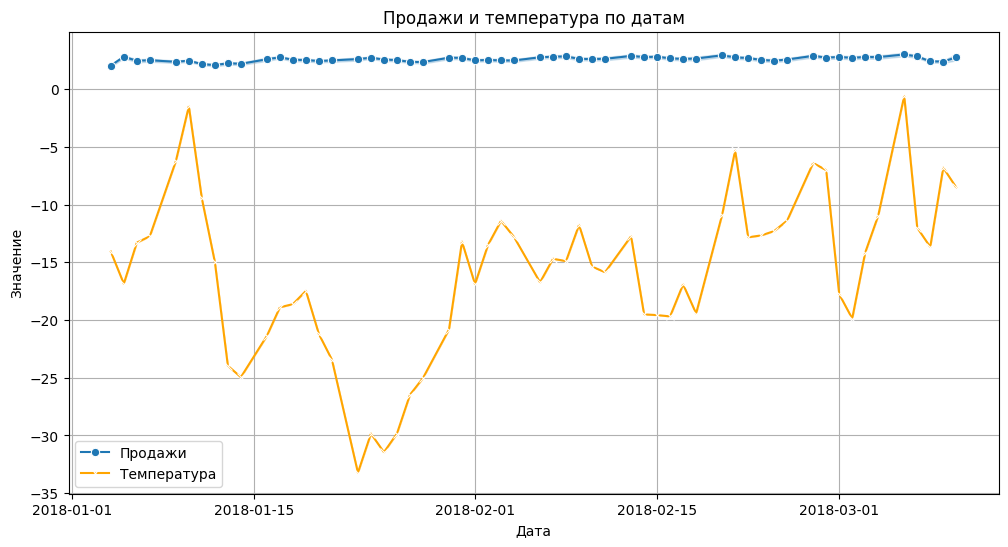

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


weather_data = pd.read_excel("/content/архив_погоды_Астана.xlsx")

# Преобразование даты в weather_data
weather_data['Местное время в Астане'] = pd.to_datetime(
    weather_data['Местное время в Астане'],
    format='%d.%m.%Y %H:%M'
)

# Извлечение только даты (без времени)
weather_data['Дата'] = weather_data['Местное время в Астане'].dt.date
df['Дата'] = df['Дата'].dt.date

# Группируем температуру по дате, чтобы получить среднюю температуру за день
daily_weather = weather_data.groupby('Дата')['T'].mean().reset_index()

# Объединяем таблицы по дате
merged_df = pd.merge(df, daily_weather, on='Дата', how='inner')

# Построение графиков
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x='Дата', y='Количество', marker='o', label='Продажи')
sns.lineplot(data=merged_df, x='Дата', y='T', marker='x', label='Температура', color='orange')
plt.title('Продажи и температура по датам')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()
